# Beijing Air-Quality Time Series Project
### Modeling Time Series

by Dolci Sanders and Paul Torres



In [245]:
# Pandas/Data readers/ etc 
import pandas as pd
import numpy as np
import pickle

# Visuals 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats Models
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# PMDARIMA
import pmdarima
from pmdarima import auto_arima    # for determining ARIMA orders

# Facebook Prophet 
from fbprophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))



## Read in pickle, check index for date time

In [276]:
train = pd.read_pickle('PKL/train.pkl')
test = pd.read_pickle('PKL/test.pkl')
time = pd.read_pickle('PKL/time.pkl')

In [255]:
#train.index = pd.DatetimeIndex(train.index).to_period('D')
#test.index = pd.DatetimeIndex(test.index).to_period('D')

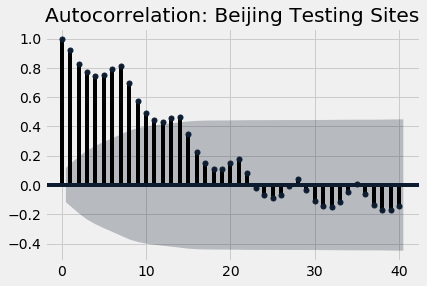

In [256]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(np.log(df['PM2.5']),title=title,lags=lags);

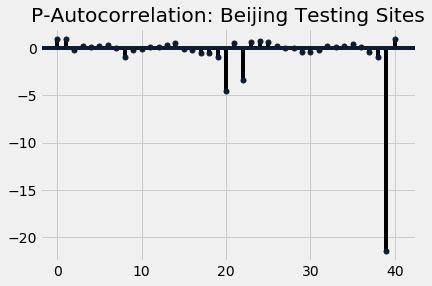

In [257]:
title = 'P-Autocorrelation: Beijing Testing Sites'
lags = 40
plot_pacf(np.log(df['PM2.5']),title=title,lags=lags);

## Find Ideal Parameters and then run models:

### Auto Arima and SARIMAX (seasonal arimas) Models

We used auto arima to look for the best parameters. We capped our search at 3 for p and q values.
We found the best recipes wer (1,0,1) and (0,0,0) so we tried those in both ARIMA and SARIMAX. 

In [248]:
stepwise_fit = auto_arima(train['PM2.5'], start_p=0, start_q=0,
                         max_p=3, max_q=3, m=12,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   # we don't want to know if an order does not work
                         suppress_warnings=True,  # we don't want convergence warnings
                         stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=12619.683, Time=3.10 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12620.583, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12183.206, Time=1.63 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12188.912, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13621.719, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=12181.777, Time=0.15 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=12183.237, Time=0.50 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=12185.222, Time=1.51 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=12138.074, Time=0.25 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=12139.922, Time=0.91 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=12139.927, Time=0.87 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=12141.922, Time=2.01 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=12138.328, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=12138.343, Time=1.63 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6064.561
Date:                Thu, 10 Sep 2020   AIC                          12137.123
Time:                        23:25:51   BIC                          12157.211
Sample:                             0   HQIC                         12144.715
                               - 1121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.1073      4.837     10.772      0.000      42.626      61.588
ar.L1          0.3551      0.035     10.131      0.000       0.286       0.424
ma.L1          0.3352      0.040      8.440      0.000       0.257       0.413
sigma2      2926.6341     80.150     36.515      0.000    2769.543    3083.725
===================================================================================
Ljung-Box (Q):                       37.49   Jarque-Bera (JB):               767.87
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.76
Prob(H) (two-sided):                  0.97   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Model 
## (1,0,1)

- ARIMA(1,0,1) MSE Error: 3519.6074847104087
- ARIMA(1,0,1) RMSE Error:  59.32627988261533

In [13]:
auto_arima(train['PM2.5'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6064.561
Date:                Thu, 10 Sep 2020   AIC                          12137.123
Time:                        22:34:39   BIC                          12157.211
Sample:                             0   HQIC                         12144.715
                               - 1121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.1073      4.837     10.772      0.000      42.626      61.588
ar.L1          0.3551      0.035     10.131      0.000       0.286       0.424
ma.L1          0.3352      0.040      8.440      0.000       0.257       0.413
sigma2      2926.6341     80.150     36.515      0.000    2769.543    3083.725
===================================================================================
Ljung-Box (Q):                       37.49   Jarque-Bera (JB):               767.87
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.76
Prob(H) (two-sided):                  0.97   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model_arima = ARIMA(train['PM2.5'],order=(1,0,1))
results = model_arima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:                     ARMA(1, 1)   Log Likelihood               -6064.561
Method:                       css-mle   S.D. of innovations             54.098
Date:                Thu, 10 Sep 2020   AIC                          12137.123
Time:                        22:35:07   BIC                          12157.211
Sample:                    03-01-2013   HQIC                         12144.715
                         - 03-25-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.7980      3.343     24.171      0.000      74.246      87.350
ar.L1.PM2.5     0.3551      0.045      7.916      0.000       0.267       0.443
ma.L1.PM2.5     0.3352      0.045      7.460      0.000       0.247       0.423
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8164           +0.0000j            2.8164            0.0000
MA.1           -2.9834           +0.0000j            2.9834            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
# Get predicted values

start=len(train)
end=len(train)+len(test)-1
predictions_arima = results.predict(start=start, end=end, dynamic=False).rename('arima(1,0,1) Predictions')

In [17]:
for i in range(len(predictions_arima)):
    print(f"predicted={predictions_arima[i]:<19}, expected={test['PM2.5'][i]}")

predicted=46.465320202958615 , expected=12.157457729468598
predicted=68.60782632231847  , expected=14.887077294685993
predicted=76.46976118374604  , expected=69.37003968253968
predicted=79.26122568338945  , expected=17.64017896354853
predicted=80.25236516624119  , expected=27.14522946859903
predicted=80.60427989580093  , expected=148.48958333333334
predicted=80.72923100412     , expected=42.42942290552585
predicted=80.77359623853258  , expected=8.358640755379886
predicted=80.78934859200078  , expected=17.71009487457697
predicted=80.79494163446009  , expected=72.4798611111111
predicted=80.7969275043185   , expected=114.5050681504486
predicted=80.79763260876268  , expected=134.6143676673568
predicted=80.79788296367649  , expected=87.25252525252525
predicted=80.7979718548803   , expected=21.928085199824327
predicted=80.79800341665792  , expected=73.91788766788768
predicted=80.7980146230064   , expected=54.8873556998557
predicted=80.79801860194091  , expected=40.23776781793086
predicted=80

In [18]:
error = mean_squared_error(test['PM2.5'], predictions_arima)
print(f'ARIMA(1,0,1) MSE Error: {error:18}')

error = rmse(test['PM2.5'], predictions_arima)
print(f'ARIMA(1,0,1) RMSE Error: {error:18}')

ARIMA(1,0,1) MSE Error: 3519.6074847104087
ARIMA(1,0,1) RMSE Error:  59.32627988261533


## Arima using the log of PM2.5 
## (1,0,1)

- ARIMA(1,0,1) MSE Error: 0.6443607375932078
- ARIMA(1,0,1) RMSE Error: 0.8027208341591787

In [277]:
train['PM2.5'] = np.log(train['PM2.5'])
test['PM2.5'] = np.log(test['PM2.5'])

In [281]:
# keeping the same order, but using the log 
model_arima_log = ARIMA(train['PM2.5'],order=(1,0,1))
results = model_arima_log.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:                     ARMA(1, 1)   Log Likelihood               -1227.306
Method:                       css-mle   S.D. of innovations              0.723
Date:                Thu, 10 Sep 2020   AIC                           2462.612
Time:                        23:36:41   BIC                           2482.700
Sample:                    03-01-2013   HQIC                          2470.204
                         - 03-25-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0504      0.042     95.664      0.000       3.967       4.133
ar.L1.PM2.5     0.3380      0.046      7.415      0.000       0.249       0.427
ma.L1.PM2.5     0.2987      0.044      6.724      0.000       0.212       0.386
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.9583           +0.0000j            2.9583            0.0000
MA.1           -3.3480           +0.0000j            3.3480            0.5000
-----------------------------------------------------------------------------
"""

In [283]:
# Get predicted values

start=len(train)
end=len(train)+len(test)-1
predictions_arima = results.predict(start=start, end=end, dynamic=False).rename('arima(1,0,1) Predictions')

In [284]:
error = mean_squared_error(test['PM2.5'], predictions_arima)
print(f'ARIMA(1,0,1) MSE Error: {error:18}')

error = rmse(test['PM2.5'], predictions_arima)
print(f'ARIMA(1,01) RMSE Error: {error:18}')

ARIMA(1,0,1) MSE Error: 0.6443607375932078
ARIMA(1,01) RMSE Error: 0.8027208341591787


## Running SARIMAX using Log PM2.5
## (1,0,1)
- SARIMAX(1,0,1) MSE Error: 12.386112862104985
- SARIMAX(1,0,1) RMSE Error: 3.5193909788633864

In [33]:
model_SARIMAX = SARIMAX(train['PM2.5'],order=(1,0,1))
results = model_SARIMAX.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1381.647
Date:                Thu, 10 Sep 2020   AIC                           2769.294
Time:                        22:41:05   BIC                           2784.360
Sample:                    03-01-2013   HQIC                          2774.988
                         - 03-25-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9856      0.006    179.039      0.000       0.975       0.996
ma.L1         -0.1735      0.032     -5.338      0.000      -0.237      -0.110
sigma2         0.6868      0.028     24.113      0.000       0.631       0.743
===================================================================================
Ljung-Box (Q):                      192.00   Jarque-Bera (JB):               162.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.79
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Get predicted values

start=len(train)
end=len(train)+len(test)-1
predictions_SARIMAX = results.predict(start=start, end=end, dynamic=False).rename('SARIMAX(1,0,1) Predictions')

In [36]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['PM2.5'], predictions_SARIMAX)
print(f'SARIMAX(1,0,1) MSE Error: {error:18}')

from statsmodels.tools.eval_measures import rmse
error = rmse(test['PM2.5'], predictions_SARIMAX)
print(f'SARIMAX(1,0,1) RMSE Error: {error:18}')


SARIMAX(1,0,1) MSE Error: 12.386112862104985
SARIMAX(1,0,1) RMSE Error: 3.5193909788633864


## Facebook Prophet
Works best on daily predictions, so we will try to look at this. 
We must change the headers to 'ds' for the dates and the outcome is 'y'.

This model gives back a lot of data. It shows that the overall trend is going down, which is in line with all the research I was able to find online. Beijing has been very agressive about getting it's air pollution under control, and the data shows it is paying off. 


In [188]:
fbtrain = pd.read_pickle('PKL/train.pkl')
fbtest = pd.read_pickle('PKL/test.pkl')

In [190]:
#reset index

fbtrain.reset_index(inplace = True)

In [191]:
# Special format wanted for FB Prophet
fbtrain.rename(columns={"Date": "ds", "PM2.5": "y"}, inplace = True)

In [192]:
# We have had better luck with scores using the log of PM2.5 (y)
fbtrain.y = np.log(fbtrain.y)

In [193]:
# FaceBook Prophet fitting

m = Prophet(daily_seasonality = True, changepoint_prior_scale=0.01)
m.fit(fbtrain)
future = m.make_future_dataframe(periods= 365, freq = 'D')
bam = m.predict(future)

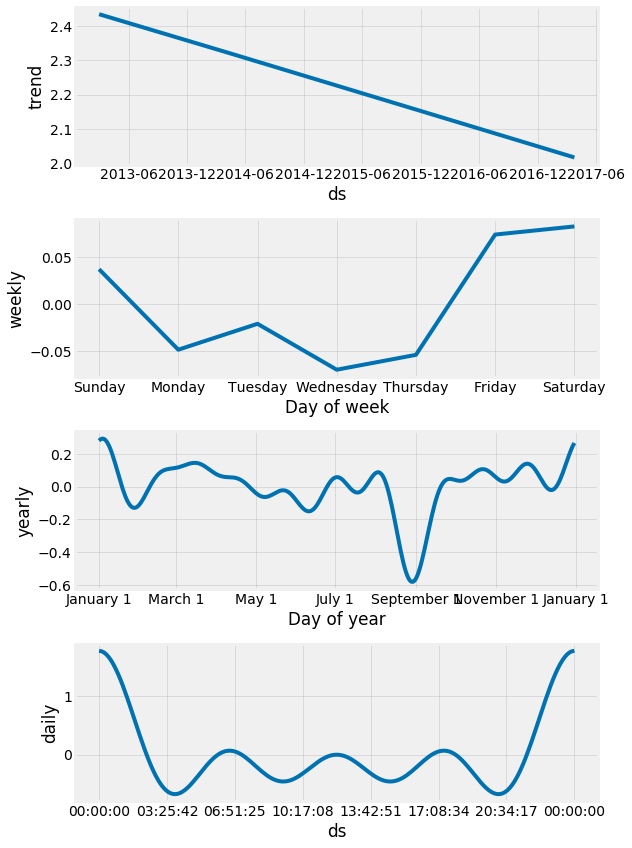

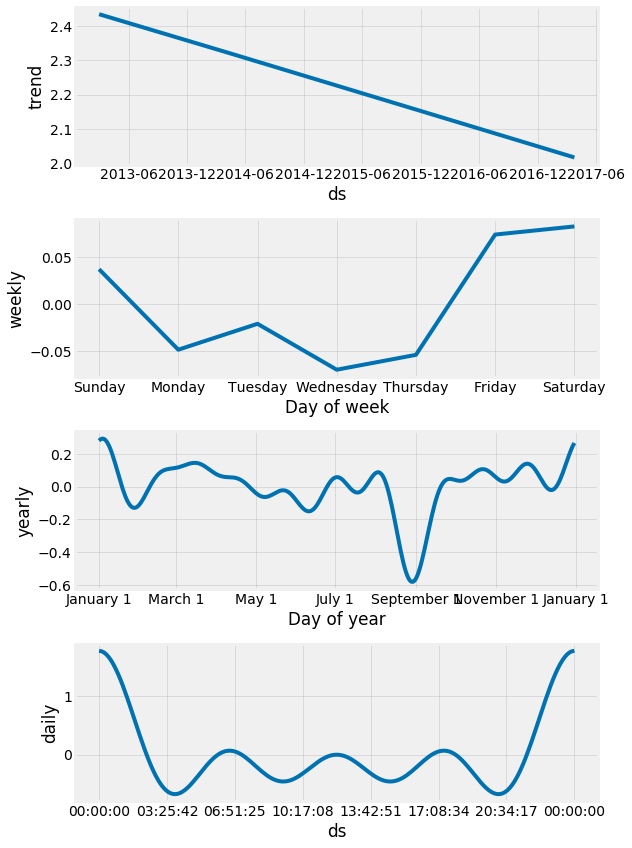

In [194]:
m.plot_components(bam)

In [195]:
df = pd.DataFrame()
df['ds'] = bam['ds']
df['yhat'] = bam['yhat']

In [196]:
fbtest.shape

(281, 1)

In [197]:
df.rename(columns={"ds": "Date", "yhat": "PM2.5"}, inplace = True)
df = df.set_index('Date')

In [198]:
df = df.loc['2016-03-26':'2016-12-31']

In [200]:
fbtest['PM2.5'] = np.log(fbtest['PM2.5'])
time['PM2.5'] = np.log(time['PM2.5'])

## Facebook Prophet Prediction

Looking at the graph here, we can see the predicted value looks pretty good. 
It may trend lower, but that matches what is happening in the present day. 

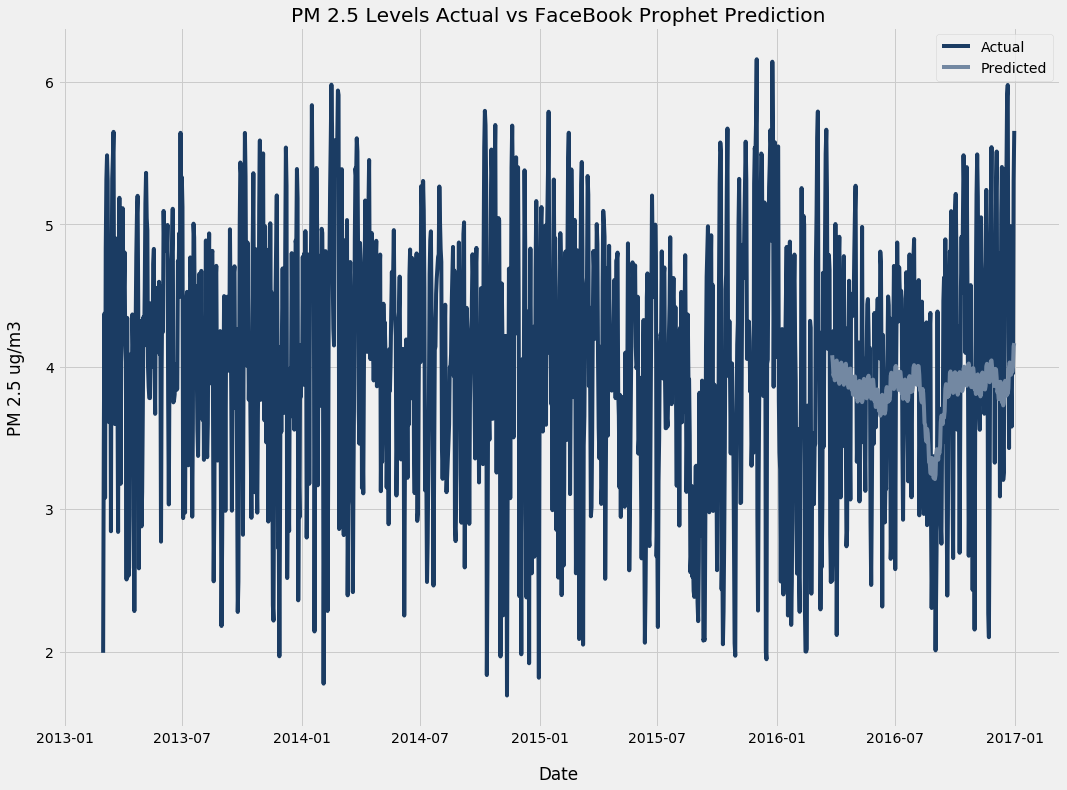

In [201]:
# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 80 , l= 25, n= 6))



fig, ax = plt.subplots(figsize=(16, 12))
sns.lineplot(y = 'PM2.5', x = time.index, data = time, label = 'Actual')
sns.lineplot(y = 'PM2.5', x = df.index, data = df, label = 'Predicted')
plt.title('PM 2.5 Levels Actual vs FaceBook Prophet Prediction')
plt.xlabel('Date', labelpad=20)
plt.ylabel('PM 2.5 ug/m3', labelpad=20)
plt.legend()
plt.show()

fig.savefig('PNG/FaceBookProphet.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [202]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-03-26 00:00:00 and 2015-03-26 00:00:00


In [203]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-03-27,4.348909,3.366584,5.463911,4.677571,2015-03-26
1,2015-03-28,4.355441,3.317821,5.383620,4.196889,2015-03-26
2,2015-03-29,4.251396,3.198434,5.381917,4.319431,2015-03-26
3,2015-03-30,4.108811,3.044643,5.110105,5.001023,2015-03-26
4,2015-03-31,4.175514,3.106072,5.172673,4.970786,2015-03-26


In [204]:
cutoffs = pd.to_datetime(['2015-06-01'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

## RMSE MSE Scores

We can see here that the scores are similar, but both show that the farther away the prediction is, the higher the RMSE/MSE Score with exception to around day 100. This could be because some of the seasonaility help explain those days better, and because we have daily seasonality built into FB Prophet, it works really well for daily predictions. 

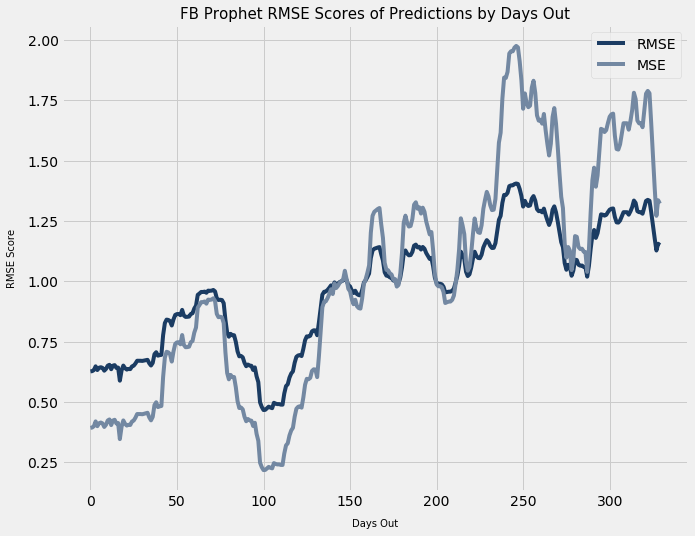

In [205]:
from fbprophet.diagnostics import performance_metrics

fig, ax = plt.subplots(figsize=(10, 8))
df_p = performance_metrics(df_cv)
plt.plot(df_p['rmse'], label = 'RMSE')
plt.plot(df_p['mse'], label = 'MSE')
plt.title('FB Prophet RMSE Scores of Predictions by Days Out', fontsize = 15)
plt.xlabel('Days Out', fontsize = 10, labelpad = 10)
plt.ylabel('RMSE Score', fontsize = 10, labelpad = 10)
plt.legend();

fig.savefig('PNG/FBP_RMSE_MSE.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )